<a href="https://colab.research.google.com/github/KonaLavanya/KonaLavanya-ReDI-SS22-DataScience-Final-Project-Python/blob/main/Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
!pip install stanza
import stanza

     |████████████████████████████████| 574 kB 8.0 MB/s 
     |████████████████████████████████| 4.0 MB 38.7 MB/s 
     |████████████████████████████████| 175 kB 58.5 MB/s 
     |████████████████████████████████| 880 kB 40.7 MB/s 
     |████████████████████████████████| 596 kB 48.4 MB/s 
     |████████████████████████████████| 6.6 MB 24.1 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=7ffcb9315f688018f6acc792152d4a46149c7a058d3e9652463ab216c7380e61
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=8a95e466f7539b1b19ed7732ad69b1627659c436ed75ca89965c4ac55feed09c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built emoji sacremoses
  Attempting uninstall: pyyaml
    Fou

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
stanza.download('en') # download English model

2022-05-03 18:53:45 INFO: Downloading default packages for language: en (English)...


2022-05-03 18:54:03 INFO: Finished downloading models and saved to /root/stanza_resources.


Real-world data is often messy and noisy. 

To clean it, we often perform **preprocessing** steps:

* tokenization:
    * split the text into sentences,
    * split the sentences into words.
* convert to lowercase words
* remove punctuation
* remove stopwords
* remove numbers
* remove small words (e.g., fewer than 3 characters) 
* ...

Some Python functions to handle text (s is a string variable): 
* `s.startswith(t)`
* `s.endswith(t)`
* `t in s`
* `s.isupper()`; `s.islower()`; `s.istitle()`
* `s.isalpha()`; `s.isdigit()`; `s.isalnum()`
* `s.lower()`; `s.upper()`; `s.titlecase()`
* `s.split()`
* `s.splitlines()`
* `s.join(t)`
* `s.strip()`; `s.rstrip()`
* `s.find(t)`; `s.rfind(t)`
* `s.replace(u,v)`

### Tokenization

* Tokenization is the first step in NLP (Natural Language Processing).
* It is the process of breaking strings into tokens (sentence, words, ..) 
* Python has a native tokenizer, the `.split()` function:


In [ ]:
text = "There's still much to do, still so much to learn."
tokens = text.split() 
print(tokens)

* The NLTK tokenizer is more robust.
* It tokenizes a sentence into words and punctuation.

In [ ]:
tokens = nltk.word_tokenize(text)
print(tokens)

Sometimes, it is useful to tokenize into: 
* bigrams (two words),
* trigrams (three words), or 
* n-grams (n words)

In [ ]:
from nltk.util import ngrams, bigrams, trigrams

In [ ]:
sent = "The quick brown fox jumps over the lazy dog" 
tokens = nltk.word_tokenize(sent)

# splitting sentence into bigrams
list(bigrams(tokens))

In [ ]:
# splitting sentence into trigrams
list(trigrams(tokens))

In [ ]:
# splitting sentence into 5-grams
list(ngrams(tokens , 5))

Sometimes, you want to split sentences from a long text string

In [ ]:
text = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third Sentence? Yes, it is!"
sentences = nltk.sent_tokenize(text)
sentences

### Punctuation Removal

* Punctuation is not always useful in predicting the meaning of texts, 
    * they are often removed along with stop words.
* Removing punctuation leaves you only with alpha-numeric characters.


In [ ]:
import re  # regular expressions

In [ ]:
raw_text = "this is a test. To demonstrate 2 regex expressions!!"

# letters only
letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
letters_only_text

In [ ]:
# keep numbers
letnum_text = re.sub("[^a-zA-Z0-9\s]+", " ", raw_text)
letnum_text

* The problem here is that this code will remove everything but a-z, A-Z, and 0-9 
* This means non-ascii characters, e.g. `ü` or `é`, will be removed as well.

In [ ]:
raw_text = "this is a test. Schöne Grüße!" 
letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
letters_only_text

A possible solution is to remove punctuation only, using this code:

In [ ]:
import string

In [ ]:
string.punctuation

In [ ]:
raw_text = "this is a test. Schöne Grüße!" 
exclude = set(string.punctuation)
text = ''.join(ch for ch in raw_text if ch not in exclude) 
text

In [ ]:
raw_text = "this is a test. Schöne Grüße!" 
text = raw_text.translate(str.maketrans('', '', string.punctuation)) 
text

Whether deleting punctuation is a good idea depends entirely on your data:
* If you want to extract specific information, e.g. a `$` amount, you want to keep the dollar sign in, so you can extract the amount that follows it.
* Training a spam classifier: spam e-mails or texts usually contain more punctuation
* If you process social media (e.g., Twitter) data, you may want to find hashtags and/or mentions, hence you want to keep `#` and `@` characters.

### Stopword Removal

* Stop words are words that may not carry any valuable information, 
    * articles ("the"), 
    * conjunctions ("and"), or 
    * propositions ("with").
* If you seek to find the most common words in your text, and find that those most common words are "the" and "a" this doesn’t tell you much about the data!
* NLP Python libraries like NLTK usually come with an in-built stopword list

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

{'ours', 'how', 'so', 'no', 'them', 'an', 'too', 'again', "doesn't", 'been', 'my', 'o', "mustn't", 'ourselves', 're', 'few', 'him', "she's", 'can', 'be', 'now', 'a', 'shan', 'from', 'the', 'wouldn', "it's", 'do', 'couldn', 'which', "should've", "aren't", 'whom', 'about', 'aren', 'shouldn', "won't", "needn't", 'what', "mightn't", 'we', 'under', 'she', 'as', 'or', 'against', 'only', 'any', "you've", 'd', 'weren', 'once', 'isn', 'hadn', 'her', 'nor', 'other', 'he', 'over', 'here', "you'll", 'our', 'through', 'll', 'this', 'than', 'up', 'has', 'all', 'ma', 'themselves', 'being', 'not', 'their', 'haven', "weren't", 'down', 'by', 'but', 'off', 'y', 'wasn', 'you', 'just', "hasn't", 'when', 'was', 'between', 's', "isn't", 'mustn', 'out', 'because', 'will', 'and', 'ain', 'most', 'doing', 'while', "hadn't", 'have', 'myself', 'yours', 'they', 'me', 'itself', 'don', 'won', 'are', 'who', 'these', 'above', 'below', 'your', 'each', 'it', "don't", 'himself', 'hers', 'doesn', "you're", 'then', 'more', 

In [ ]:
sent = "This is a sample sentence, showing the stop words filtration."

word_tokens = nltk.word_tokenize(sent)
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
print(filtered_sentence)

In some cases *stopwords* matter.

For example, in identifying negative reviews or recommendations. People will use *stopwords* like “no” and “not” in negative reviews:

"I will **not** buy this product again. I saw **no** benefits in using it"

### Stemming and Lemmatization:

* Stemming and Lemmatization are Text Normalization techniques in the field of NLP
* both are used to prepare text, words, and documents for further processing
* both refer to a process of reducing a word to its root.
* a handy tool if you want to avoid treating different forms of the same word as different words,
    * e.g. `friends`, `friendship`, and `friendly`.

* the difference is that:
    * a **stem** might not be an actual word whereas 
    * a **lemma** is an actual word.
    
* Lemmatizing: `considered`, `considering`, `consider` --> `consider` 
* Stemming: `considered`, `considering`, `consider` --> `consid`

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:
sent = "The number of publications published in scientific venues is vastly increasing."
tokens = nltk.word_tokenize(sent)
stemmer = PorterStemmer()
tokens1 = [ stemmer.stem(word) for word in tokens ]
print(tokens1)

In [ ]:
lemmatizer = WordNetLemmatizer()
tokens2 = [ lemmatizer.lemmatize(word) for word in tokens ]
print(tokens2)

In [ ]:
tokens3 = [ lemmatizer.lemmatize(word, pos='v') for word in tokens ]
print(tokens3)

### Putting it All Together


* Raw Text 
    * --> convert to lower case 
    * --> remove punctuation
    * --> tokenize
    * --> remove stopwords
    * --> remove numbers
    * --> lemmatize --> 
* Tokens

In [ ]:
# Putting it All Together
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(raw_text):
    text = raw_text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [w for w in tokens if not w.isdigit()]
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens] 
    return tokens

In [ ]:
text = """
General relativity, also known as the general theory of relativity, 
is the geometric theory of gravitation published by Albert Einstein in 1915 
and is the current description of gravitation in modern physics. 
General relativity generalizes special relativity and refines Newton's law of 
universal gravitation, providing a unified description of gravity as a geometric 
property of space and time or four-dimensional spacetime. 
In particular, the curvature of spacetime is directly related to the energy and 
momentum of whatever matter and radi- ation are present. The relation is specified 
by the Einstein field equations, a system of partial differential equations.
""";

In [ ]:
tokens = preprocess(text) 
print(tokens)

['general', 'relativity', 'also', 'know', 'general', 'theory', 'relativity', 'geometric', 'theory', 'gravitation', 'publish', 'albert', 'einstein', 'current', 'description', 'gravitation', 'modern', 'physics', 'general', 'relativity', 'generalize', 'special', 'relativity', 'refine', 'newtons', 'law', 'universal', 'gravitation', 'provide', 'unify', 'description', 'gravity', 'geometric', 'property', 'space', 'time', 'fourdimensional', 'spacetime', 'particular', 'curvature', 'spacetime', 'directly', 'relate', 'energy', 'momentum', 'whatever', 'matter', 'radi', 'ation', 'present', 'relation', 'specify', 'einstein', 'field', 'equations', 'system', 'partial', 'differential', 'equations']


### Counting Words - Term Frequency
In many cases, you want to know:
* how many times a specific word appear in a text, or 
* what are the common words (most appearing).

Once we preprocessed a text, and obtained a list of tokens, we can count how many times each word occurs.

In [ ]:
from collections import Counter

In [ ]:
tokens = preprocess(text) 
print(Counter(tokens))

To sort the words based of their count in descending order (from most- to least-common):

In [ ]:
sorted(Counter(tokens).items(), key=lambda x:x[1], reverse=True)[:10]

We can also use NLTK:

In [ ]:
from nltk.probability import FreqDist

In [ ]:
fdist = FreqDist(tokens)
fdist

In [ ]:
fdist.most_common(5)

In [ ]:
fdist.plot(30, cumulative=False)

### Word Cloud

* A word cloud is an image made of words that together resemble a cloudy shape. 
* The size of a word shows how important it is 
    * e.g. how often it appears in a text -- its frequency.

In [ ]:
from wordcloud import WordCloud

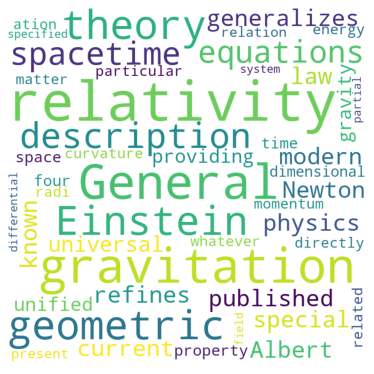

In [ ]:
wordcloud = WordCloud(width = 700, height = 700,
                      background_color ='white', 
                      min_font_size = 10)
wordcloud.generate(text)

plt.figure(figsize = (5,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

### Part of Speech (POS) Tagging

Part-of-speech tagging is used to assign parts of speech to each word of a given text (such as nouns, verbs, pronouns, adverbs, conjunction, adjectives, ...) based on its definition and its context.

In [ ]:
text = "She sells seashells on the seashore"
tokens = nltk.word_tokenize(text) 
nltk.pos_tag(tokens)

In [ ]:
text = "Our mission is to go forward, and it has only just begun."
tokens = nltk.word_tokenize(text) 
nltk.pos_tag(tokens)

In [ ]:
!pip install stanza

In [ ]:
import stanza

In [ ]:
stanza.download('en') # download English model

In [ ]:
nlp = stanza.Pipeline('en') # initialize English pipeline

In [ ]:
text = "Barack Obama was born in Hawaii."
doc = nlp(text); # run annotation over a sentence 
doc.entities

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')
doc = nlp("Chris Manning teaches at Stanford University. He lives in the Bay Area.")
doc.entities

In [ ]:
for sent in doc.sentences:
  for ent in sent.ents:
    print(f'entity: {ent.text}\ttype: {ent.type}')

### Text Representation

In [ ]:
doc1= "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2= "My father spends a lot of time driving my sister around to dance practice."
doc3= "Doctors suggest that driving may cause increased stress and blood pressure."
doc4= "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5= "Health experts say that Sugar is not good for your lifestyle."
docs = [doc1 , doc2 , doc3 , doc4 , doc5]
docs 

**Document-Term matrix**

* each row is a document
* each column is a term (word, or bigram) 
* values are counts.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(tokenizer=preprocess) 
X = vectorizer.fit_transform(docs)
print(X.shape)
print(vectorizer.get_feature_names_out())

In [ ]:
print(X.toarray())

* Term Frequency (TF): how many times a term (word) appears in a document.
* Collection Frequency (CF): how many times a term (word) appears in the whole collection.
* Document Frequency (DF): in how many documents the term appears.
* Inverse Document Frequency (IDF): the log-inverse of DF:
$$ \text{idf}(t) = \log \frac{N}{1 + \text{df}(t)} + 1 $$
    * N: total number of documents in the collection.
    

* TF-IDF: A formula that aims to define the importance of a term within a document.
* It is the product of two statistics, term frequency and inverse document frequency: 
$$ \text{tfidf}(t, d) = \text{tf}(t, d) . \text{idf}(t)$$

TF-IDF is high when:
* TF is high, so the term appears frequently in the document, and
* IDF is high, so DF is low, so the term does not appear in many documents (rare!)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=preprocess)
X = vectorizer.fit_transform(docs)
# print(vectorizer.get_feature_names())
print(X.toarray())

### Demo

In [ ]:
df = pd.read_csv('News_Final.csv')
df.shape

(93239, 11)

In [ ]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [ ]:
df.isna().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [ ]:
df.iloc[3]['Title']

'Finland GDP Expands In Q4'

In [ ]:
df.iloc[3]['Headline']

"Finland's economy expanded marginally in the three months ended December, after contracting in the previous quarter, preliminary figures from Statistics Finland showed Monday. "

In [ ]:
df['Topic'].value_counts()

economy      33928
obama        28610
microsoft    21858
palestine     8843
Name: Topic, dtype: int64

In [ ]:
vectorizer = CountVectorizer(tokenizer=preprocess, min_df=5, max_features=1000)
X = vectorizer.fit_transform(df['Title'])
X.shape

(93239, 1000)

In [ ]:
vocabulary = vectorizer.get_feature_names_out()
vocabulary[:20]

array(['abbas', 'abe', 'access', 'accord', 'accuse', 'acquire', 'act',
       'action', 'ad', 'add', 'address', 'admin', 'administration',
       'admit', 'ads', 'advance', 'affect', 'africa', 'africas', 'agenda'],
      dtype=object)

In [ ]:
counts = np.squeeze(np.asarray(X.sum(axis=0))).T
counts[:20]

array([134, 146, 175, 106, 135, 143, 289, 448, 113, 678, 452, 179, 802,
       147, 112, 113, 177, 197, 125, 139], dtype=int64)

In [ ]:
word_counts = list(zip(vocabulary, counts))
word_counts[:20]

[('abbas', 134),
 ('abe', 146),
 ('access', 175),
 ('accord', 106),
 ('accuse', 135),
 ('acquire', 143),
 ('act', 289),
 ('action', 448),
 ('ad', 113),
 ('add', 678),
 ('address', 452),
 ('admin', 179),
 ('administration', 802),
 ('admit', 147),
 ('ads', 112),
 ('advance', 113),
 ('affect', 177),
 ('africa', 197),
 ('africas', 125),
 ('agenda', 139)]

In [ ]:
sorted(word_counts, key=lambda x:x[1], reverse=True)[:20]

[('economy', 26214),
 ('obama', 22698),
 ('microsoft', 17910),
 ('obamas', 5080),
 ('us', 4713),
 ('say', 4159),
 ('palestine', 3818),
 ('new', 3741),
 ('president', 3041),
 ('economic', 2952),
 ('windows', 2735),
 ('microsofts', 2606),
 ('global', 2199),
 ('trump', 2092),
 ('growth', 1937),
 ('grow', 1912),
 ('’', 1697),
 ('plan', 1686),
 ('china', 1602),
 ('palestinian', 1599)]

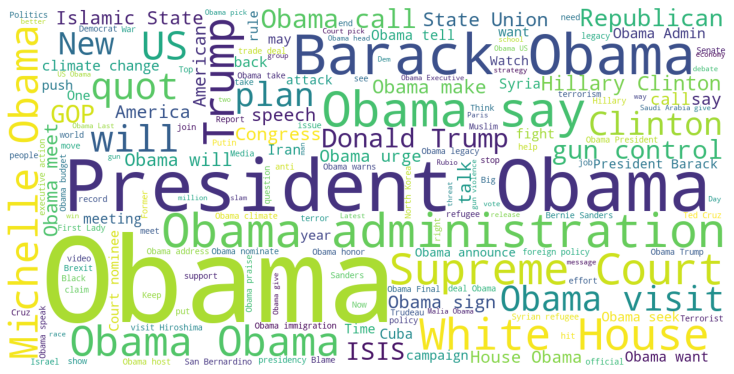

In [ ]:
bigtext = ' '.join(df[df['Topic']=='obama']['Title'])
wordcloud = WordCloud(width = 1200, height = 600, background_color ='white', min_font_size = 10)
wordcloud.generate(bigtext)

# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
wordcloud = WordCloud(width = 1200, height = 600, background_color ='white', min_font_size = 10, collocations=False)
wordcloud.generate(bigtext)

# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()